In [ ]:
!wget --no-check-certificate \
  https://hoangnhi2310.github.io/giaydep.zip \
  -O /tmp/giaydep.zip

--2020-07-28 15:28:41--  https://hoangnhi2310.github.io/giaydep.zip
Resolving hoangnhi2310.github.io (hoangnhi2310.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to hoangnhi2310.github.io (hoangnhi2310.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14661633 (14M) [application/zip]
Saving to: ‘/tmp/giaydep.zip’

/tmp/giaydep.zip    100%[===================>]  13.98M  17.6MB/s    in 0.8s    

2020-07-28 15:28:42 (17.6 MB/s) - ‘/tmp/giaydep.zip’ saved [14661633/14661633]



In [ ]:
import os
import zipfile

local_zip = '/tmp/giaydep.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/giaydep')
zip_ref.close()

In [ ]:
# Directory with our training 'giay' pictures
train_giay_dir = os.path.join('/tmp/giaydep/giay')

# Directory with our training 'giay' pictures
train_dep_dir = os.path.join('/tmp/giaydep/dep')

Now, let's see what the filenames look like in the 'giay' and 'dep' training directories:

In [ ]:
train_giay_names = os.listdir(train_giay_dir)
print(train_giay_names[:10])

train_dep_names = os.listdir(train_dep_dir)
print(train_dep_names[:10])

['00d24b4ac7603b3e6271.jpg', '9189e71e6b34976ace25.jpg', 'IMG_6345.JPG', 'IMG_6343.JPG', 'e1fa4f6fc3453f1b6654.jpg', 'cc0ae97d5b57a709fe46.jpg', '802307b98b9377cd2e82.jpg', '91f754bee6941aca4385.jpg', 'd3fd83850eaff2f1abbe.jpg', 'IMG_6338.JPG']
['7b8570b1c29b3ec5678a.jpg', 'IMG_6330.JPG', 'IMG_6336.JPG', 'cea235e187cb7b9522da.jpg', 'IMG_6332.JPG', 'IMG_6347.JPG', '72713a17883d74632d2c.jpg', 'IMG_6341.JPG', '969a1fd6adfc51a208ed.jpg', 'aa95fbf949d3b58decc2.jpg']


Let's find out the total number of giay and dep images in the directories:

In [ ]:
print('total training giay images:', len(os.listdir(train_giay_dir)))
print('total training dep images:', len(os.listdir(train_dep_dir)))

total training giay images: 11
total training dep images: 12


Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 giay and 8 dep pictures. You can rerun the cell to see a fresh batch each time:

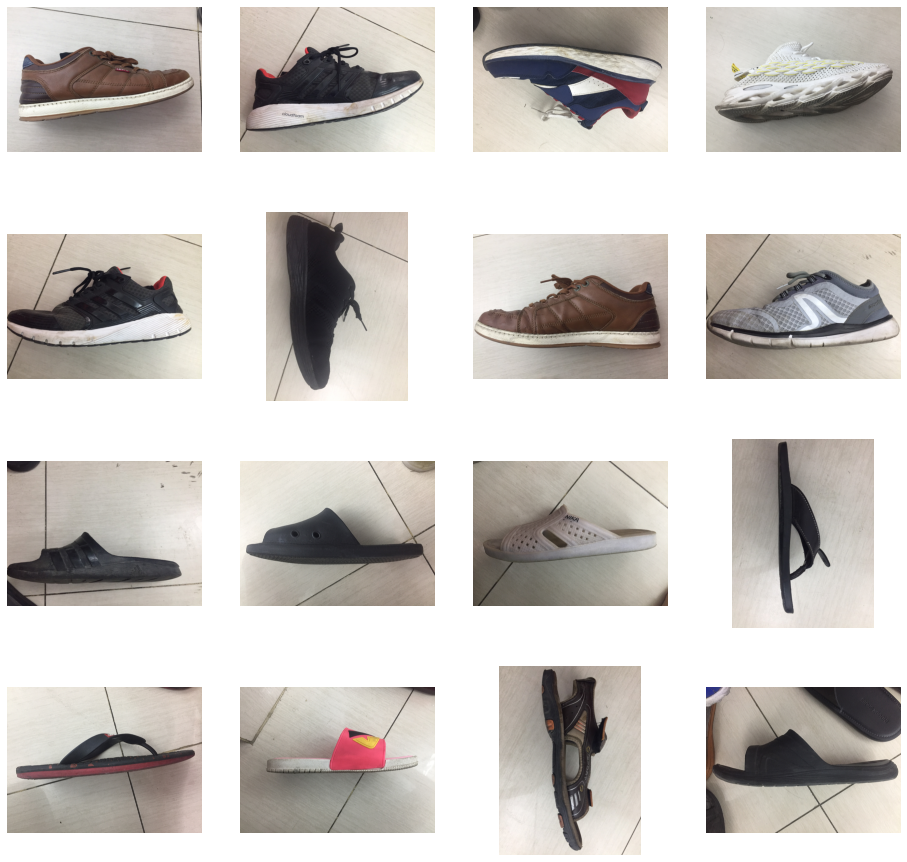

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_giay_pix = [os.path.join(train_giay_dir, fname) 
                for fname in train_giay_names[pic_index-8:pic_index]]
next_dep_pix = [os.path.join(train_dep_dir, fname) 
                for fname in train_dep_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_giay_pix+next_dep_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('giay') and 1 for the other ('dep')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

The model.summary() method call prints a summary of the NN

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    '/tmp/giaydep/',     # This is the source directory for training images
    target_size=(300, 300),
    batch_size=6,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary'
)

Found 23 images belonging to 2 classes.


# Training

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=4,
    epochs=15,
    verbose=1
)

Epoch 1/15
4/4 [==============================] - 2s 499ms/step - loss: 1.2287 - accuracy: 0.3913
Epoch 2/15
4/4 [==============================] - 2s 505ms/step - loss: 0.6912 - accuracy: 0.5217
Epoch 3/15
4/4 [==============================] - 2s 591ms/step - loss: 0.6964 - accuracy: 0.3913
Epoch 4/15
4/4 [==============================] - 2s 521ms/step - loss: 0.6601 - accuracy: 0.7391
Epoch 5/15
4/4 [==============================] - 2s 475ms/step - loss: 0.8374 - accuracy: 0.4348
Epoch 6/15
4/4 [==============================] - 2s 570ms/step - loss: 0.6885 - accuracy: 0.7826
Epoch 7/15
4/4 [==============================] - 2s 537ms/step - loss: 0.6814 - accuracy: 0.6957
Epoch 8/15
4/4 [==============================] - 2s 556ms/step - loss: 0.7112 - accuracy: 0.7391
Epoch 9/15
4/4 [==============================] - 2s 507ms/step - loss: 0.6051 - accuracy: 0.8696
Epoch 10/15
4/4 [==============================] - 2s 548ms/step - loss: 0.5180 - accuracy: 0.8696
Epoch 11/15
4/4 [==

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + "là giày")
  else:
    print(fn + " là dép")

Saving test_dep.jpg to test_dep (4).jpg
Saving test_giay.jpg to test_giay (1).jpg
[0.]
test_dep.jpg là dép
[1.]
test_giay.jpglà giày


## Visualizing Intermediate Representations

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


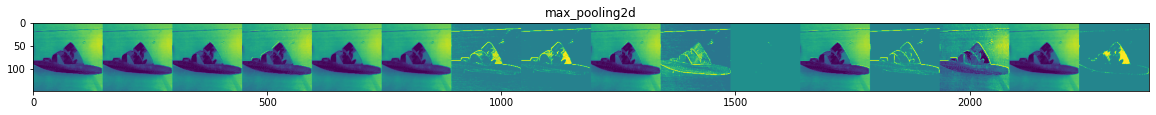

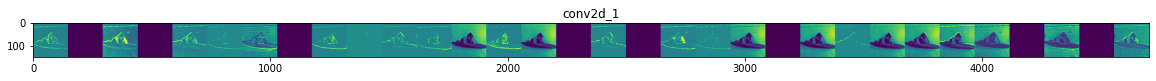

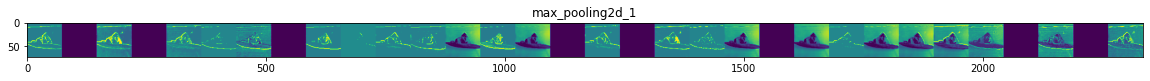

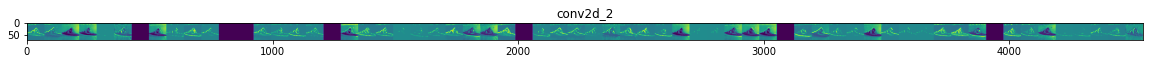

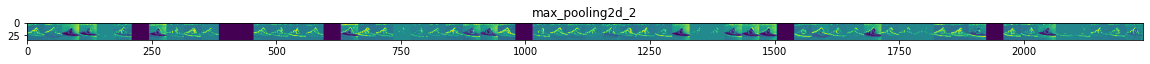

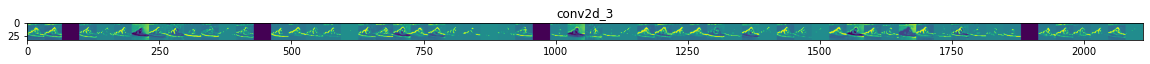

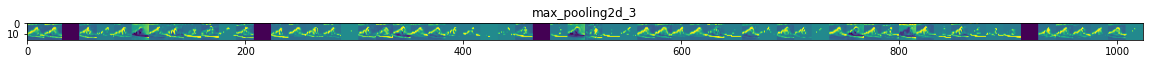

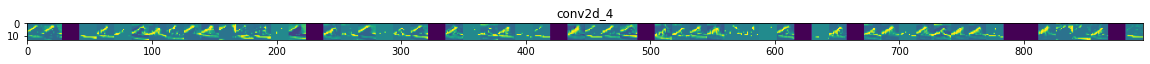

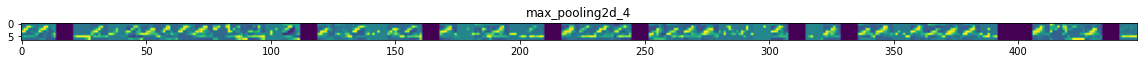

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
giay_img_files = [os.path.join(train_giay_dir, f) for f in train_giay_names]
dep_img_files = [os.path.join(train_dep_dir, f) for f in train_dep_names]
img_path = random.choice(giay_img_files + dep_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Clean Up

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)